## Classification problem using the MNIST Digit Dataset for handwritten digits.
MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

Each imgage is labeled with a digit it represents,

Goal is to be able to classify correctly the images with their corresponding digits.
## PART 1

In [1]:
#Importation of libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.datasets import load_digits
from sklearn.datasets import fetch_openml
import warnings
warnings.filterwarnings("ignore")

#default plot settings
%matplotlib inline
plt.style.use('classic')
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')

In [2]:
# load the MNIST digits dataset
digits = load_digits()

In [3]:
#available attributes
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

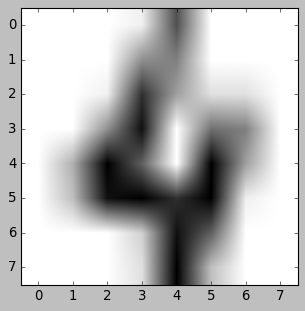

In [4]:
#sample image from the dataset
plt.figure(figsize=(4, 4))
plt.imshow(digits.images[4], cmap=plt.cm.gray_r)

In [5]:
# It's actual image pixel
digits.images[4]

array([[ 0.,  0.,  0.,  1., 11.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  7.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 13.,  6.,  2.,  2.,  0.],
       [ 0.,  0.,  7., 15.,  0.,  9.,  8.,  0.],
       [ 0.,  5., 16., 10.,  0., 16.,  6.,  0.],
       [ 0.,  4., 15., 16., 13., 16.,  1.,  0.],
       [ 0.,  0.,  0.,  3., 15., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 16.,  4.,  0.,  0.]])

In [6]:
#It's actual label
digits.target[4]

4

In [7]:
#reassigning the data and reshaping 
X,y = np.array(digits.data), digits.target
y=y.reshape(-1,1)

In [8]:
X.shape, y.shape

((1797, 64), (1797, 1))

code above shows that there are 1797 images, where each image has 64 features
This is because each image is 8 * 8 pixels and each feature represents one pixel's intensity ranging from 0(white)  to 255(black)

In [9]:
#number of different digits in the target.
print(np.unique(y))

[0 1 2 3 4 5 6 7 8 9]


In [10]:
#creating data splits for the MNIST dataset
train_Data, test_Data, train_Labels, test_Labels = train_test_split(X, y, test_size=0.2, random_state=1)

In [11]:
# code decribing the resultant splits for x and y
print("The number of training data points are: {}".format(len(train_Data)))
print("The number of test data points are: {}".format(len(test_Data)))

The number of training data points are: 1437
The number of test data points are: 360


In [12]:
#lets train the model on a logistric regression model
model = LogisticRegression()
model.fit(train_Data, train_Labels)

LogisticRegression()

In [13]:
predictions = model.predict(test_Data)

In [14]:
#classification report demonstrating the accuracy of the classifier model for each of the digits
#we can see that the classifier performs well with an overall accuracy of 97
print("Classification Report performance on the data")
print(classification_report(test_Labels, predictions))

Classification Report performance on the data
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.97      0.97      0.97        35
           2       1.00      1.00      1.00        36
           3       0.95      0.98      0.96        41
           4       0.93      1.00      0.96        38
           5       0.90      0.93      0.92        30
           6       1.00      1.00      1.00        37
           7       1.00      0.89      0.94        37
           8       0.97      0.97      0.97        29
           9       0.97      0.97      0.97        34

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



In [15]:
print ("Confusion matrix report of the data")
print(confusion_matrix(test_Labels,predictions))

Confusion matrix report of the data
[[42  0  0  0  1  0  0  0  0  0]
 [ 0 34  0  0  1  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  0  1  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  1  0 28  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  1  1  1  0 33  0  1]
 [ 0  0  0  0  0  1  0  0 28  0]
 [ 0  0  0  0  0  1  0  0  0 33]]


The digit is most likely to be a : 1


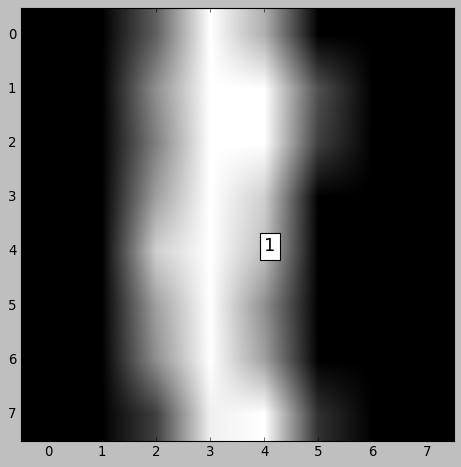

The digit is most likely to be a : 5


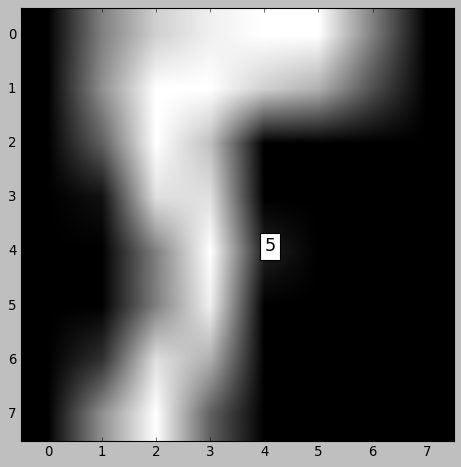

The digit is most likely to be a : 0


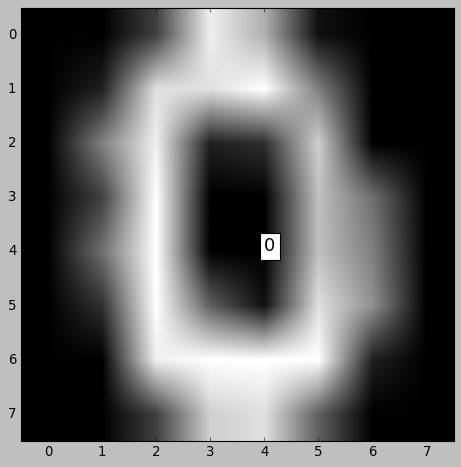

The digit is most likely to be a : 7


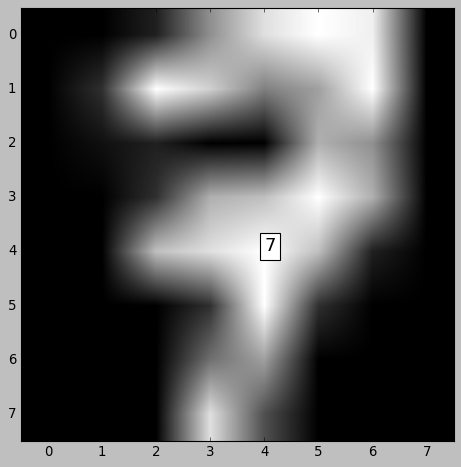

The digit is most likely to be a : 1


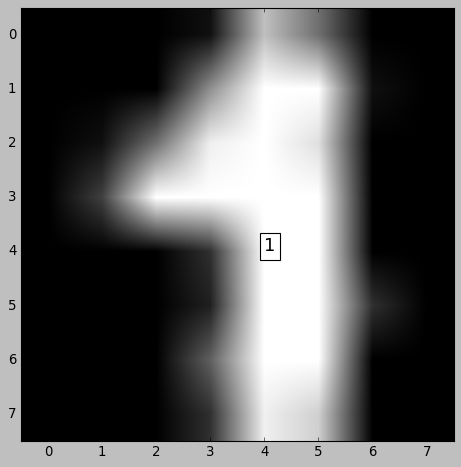

In [16]:
# loop over some sample digits from the test set
some_digits = len(test_Data[:5])
for i in range(0, some_digits):
          # take a sample image from the loop and classify it
            image = test_Data[i]
            prediction = model.predict([image])[0]
         
            # show the prediction
            imgdata = np.array(image, dtype='float')
            pixels = imgdata.reshape((8,8)) # convert the image for a 64-dim array to an 8 x 8 image
            plt.imshow(pixels,cmap='gray')
            plt.annotate(prediction,(4,4),bbox={'facecolor':'white'},fontsize=16)
            print("The digit is most likely to be a : {}".format(prediction))
            plt.show()

## PART 2: 
### LOGISTIC REGRESSION MODEL WITH A REAL WORLD EXAMPLE WITH SIGNIFICANT DATA

The Logistic Regression model that you saw above  gives you an idea of how this classifier works with python to train a machine learning model. 

Now let’s prepare a Logistic Regression model for a real-world example using more significant data to fit our model

In [17]:
#Load the MNIST Dataset

mnist = fetch_openml('mnist_784')

In [18]:
print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [19]:
#images in the dataset
# we have 70,000 images (28 by 28 images for a dimensionality of 784)
train =mnist.data.values.astype('float32')
print(train.shape)

(70000, 784)


In [20]:
#labels in the dataset
#we can see that have also have 70,000 target labels
labels = mnist.target.values.astype('int32')
print(labels.shape)

(70000,)


In [21]:
labels = labels.reshape(-1,1)
print(labels.shape)

(70000, 1)


In [22]:
#create the  Training and Testing sets
#since the Mnist data is already split to  60000 images as training set and 10000 images as a testing set, lets allocate this data.
#training set is already suffled for us which garantees  that all cross-validation folds will be similar
train_img, test_img, train_labels, test_labels = train[:60000],train[60000:],labels[:60000],labels[60000:]

In [23]:
print(train_img.shape, test_img.shape, train_labels.shape,test_labels.shape)

(60000, 784) (10000, 784) (60000, 1) (10000, 1)


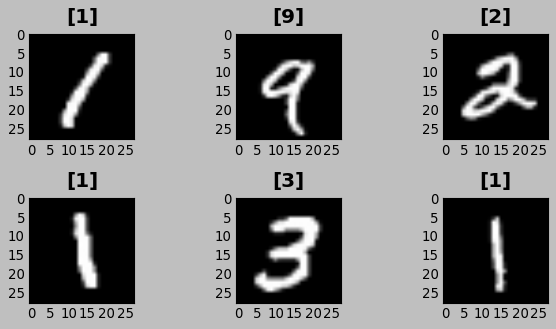

In [24]:
#sample data visualization
#Lets look at 6 images from data set with their labels
#convert thetrain datasets to (num_images, img_rows, img_cols,1) format  where 1 is the color channel for purpose of visualizing it.
trainX = train_img.reshape(train_img.shape[0], 28, 28,1)
for i in range(3, 9):
    plt.subplot(330 + (i+1))
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
    plt.title(train_labels[i]);

In [25]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
log_Reg = LogisticRegression(solver = 'lbfgs')
log_Reg.fit(train_img, train_labels)

LogisticRegression()

In [26]:
# Predict on test image data
predictions= log_Reg.predict(test_img)

In [27]:
#classification report demonstrating the accuracy of the classifier model for each of the digits
#The classifier generally performs well with an overall accuracy of 93
print("Classification Report performance on the data")
print(classification_report(test_labels, predictions))

Classification Report performance on the data
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.97      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.91      0.91      1010
           4       0.93      0.93      0.93       982
           5       0.90      0.87      0.89       892
           6       0.94      0.95      0.95       958
           7       0.93      0.93      0.93      1028
           8       0.87      0.89      0.88       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



In [30]:
print ("Confusion matrix report of the data")
confus_m=confusion_matrix(test_labels,predictions)
print(confus_m)

Confusion matrix report of the data
[[ 963    0    0    3    1    3    4    4    2    0]
 [   0 1112    4    2    0    1    3    2   11    0]
 [   3   10  926   15    6    4   15    8   42    3]
 [   4    1   21  916    1   26    3    9   22    7]
 [   1    1    7    3  910    0    9    7   10   34]
 [  11    2    1   33   11  776   11    6   35    6]
 [   9    3    7    3    7   16  910    2    1    0]
 [   1    6   24    5    7    1    0  951    3   30]
 [   8    7    6   23    6   26   10   10  869    9]
 [   9    7    0   11   25    6    0   22    7  922]]


In [31]:
#we can also use the score method to get the model accuracy
model_score =log_Reg.score(test_img,test_labels)

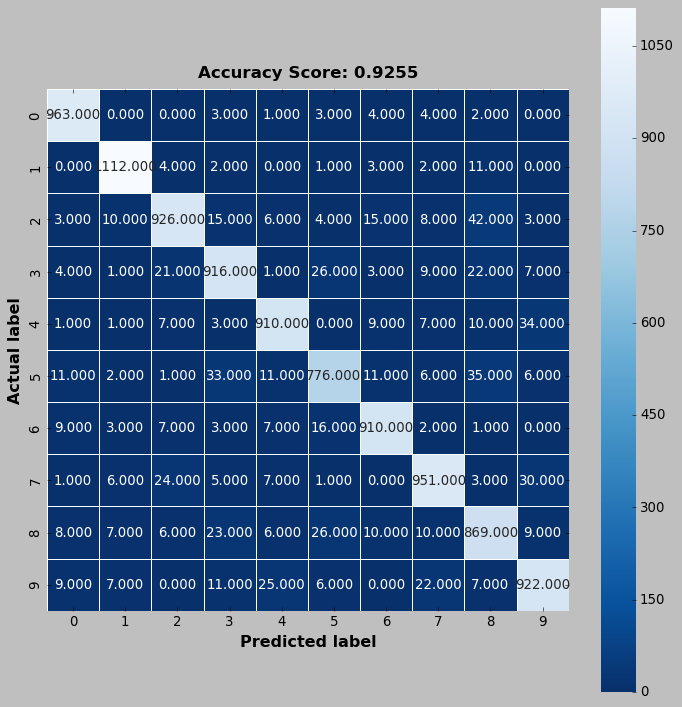

In [32]:
#visualising the confusion matrix using heatmap
plt.figure(figsize=(9,9))
sns.heatmap(confus_m, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(model_score)
plt.title(all_sample_title, size = 15)
plt.show()